In [1]:
import os
import numpy as np
import netCDF4 as nc
import math as mt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from scipy.stats import pearsonr
import re
import matplotlib.patches as patches

In [18]:
models = ['ACCESS-CM2', 'AWI-CM-1-1-MR', 'CanESM5', 'CESM2-WACCM', 'CESM2', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 
          'CNRM-ESM2-1', 'EC-Earth3', 'FGOALS-g3', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC6', 'MIROC-ES2L', 'MPI-ESM1-2-LR', 
          'MRI-ESM2-0', 'NorESM2-LM', 'UKESM1-0-LL']

ERA5 = np.zeros((6))
ERA5 = np.loadtxt('/work/ba1264/a270210/SCRIPT/Arctic_Winds_Intensification_paper/Figure3.txt', skiprows=3, delimiter=',', max_rows=1)
models_ensmeans = np.zeros((len(models),12))
models_ensmeans = np.loadtxt('/work/ba1264/a270210/SCRIPT/Arctic_Winds_Intensification_paper/Figure3.txt', skiprows=5, delimiter=',', max_rows=19)
ENSEMBLE = np.zeros((12))
ENSEMBLE = np.loadtxt('/work/ba1264/a270210/SCRIPT/Arctic_Winds_Intensification_paper/Figure3.txt', skiprows=25, delimiter=',', max_rows=1)
models_ensspread = np.zeros((len(models),12))
models_ensspread = np.loadtxt('/work/ba1264/a270210/SCRIPT/Arctic_Winds_Intensification_paper/Figure3.txt', skiprows=27, delimiter=',', max_rows=19)

In [19]:
JFM_dt_mean=np.zeros((2,len(models)))
JAS_dt_mean=np.zeros((2,len(models)))
JFM_rw_mean=np.zeros((2,len(models)))
JAS_rw_mean=np.zeros((2,len(models)))
JFM_sic_mean=np.zeros((2,len(models)))
JAS_sic_mean=np.zeros((2,len(models)))


for m in range(len(models)):
    JFM_dt_mean[0,m] = models_ensmeans[m,0]
    JAS_dt_mean[0,m] = models_ensmeans[m,1]
    JFM_rw_mean[0,m] = models_ensmeans[m,2]
    JAS_rw_mean[0,m] = models_ensmeans[m,3]
    JFM_sic_mean[0,m] = models_ensmeans[m,4]
    JAS_sic_mean[0,m] = models_ensmeans[m,5]
    JFM_dt_mean[1,m] = models_ensmeans[m,6]
    JAS_dt_mean[1,m] = models_ensmeans[m,7]
    JFM_rw_mean[1,m] = models_ensmeans[m,8]
    JAS_rw_mean[1,m] = models_ensmeans[m,9]
    JFM_sic_mean[1,m] = models_ensmeans[m,10]
    JAS_sic_mean[1,m] = models_ensmeans[m,11]

In [20]:
JFM_dt_spread=np.zeros((2,len(models)))
JAS_dt_spread=np.zeros((2,len(models)))
JFM_rw_spread=np.zeros((2,len(models)))
JAS_rw_spread=np.zeros((2,len(models)))
JFM_sic_spread=np.zeros((2,len(models)))
JAS_sic_spread=np.zeros((2,len(models)))

for m in range(len(models)):
    JFM_dt_spread[0,m] = models_ensspread[m,0]
    JAS_dt_spread[0,m] = models_ensspread[m,1]
    JFM_rw_spread[0,m] = models_ensspread[m,2]
    JAS_rw_spread[0,m] = models_ensspread[m,3]
    JFM_sic_spread[0,m] = models_ensspread[m,4]
    JAS_sic_spread[0,m] = models_ensspread[m,5]
    JFM_dt_spread[1,m] = models_ensspread[m,6]
    JAS_dt_spread[1,m] = models_ensspread[m,7]
    JFM_rw_spread[1,m] = models_ensspread[m,8]
    JAS_rw_spread[1,m] = models_ensspread[m,9]
    JFM_sic_spread[1,m] = models_ensspread[m,10]
    JAS_sic_spread[1,m] = models_ensspread[m,11]

In [5]:
jfm_era5_dt = ERA5[0]
jas_era5_dt = ERA5[1]
jfm_era5_rw = ERA5[2]
jas_era5_rw = ERA5[3]
jfm_era5_sic = ERA5[4]
jas_era5_sic = ERA5[5]

In [13]:
x_hist_JFM = np.zeros((20))
y_hist_JFM = np.zeros((20))

x_hist_JFM[0] = jfm_era5_dt
y_hist_JFM[0] = jfm_era5_rw
x_hist_JFM[1:] = JFM_dt_mean[0]
y_hist_JFM[1:] = JFM_rw_mean[0]

x = np.array(x_hist_JFM)[:,np.newaxis]
y = y_hist_JFM
fit = np.polyfit(x_hist_JFM, y_hist_JFM, deg=1, full=True)
m_hist_JFM=fit[0][0]
c_hist_JFM=fit[0][1]
r_hist_JFM = np.round(pearsonr(x_hist_JFM,y_hist_JFM)[0], 3)
r_squared_hist_JFM = np.round(r_hist_JFM**2, 3)
p_hist_JFM = pearsonr(x_hist_JFM, y_hist_JFM)[1]

#########

x_hist_JAS = np.zeros((20))
y_hist_JAS = np.zeros((20))

x_hist_JAS[0] = jas_era5_dt
y_hist_JAS[0] = jas_era5_rw
x_hist_JAS[1:] = JAS_dt_mean[0]
y_hist_JAS[1:] = JAS_rw_mean[0]

fit = np.polyfit(x_hist_JAS, y_hist_JAS, deg=1, full=True)
m_hist_JAS=fit[0][0]
c_hist_JAS=fit[0][1]
r_hist_JAS = np.round(pearsonr(x_hist_JAS,y_hist_JAS)[0], 3)
r_squared_hist_JAS = np.round(r_hist_JAS**2, 3)
p_hist_JAS = pearsonr(x_hist_JAS, y_hist_JAS)[1]

#########

x_tot_JFM = np.zeros((19))
y_tot_JFM = np.zeros((19))

x_tot_JFM[:] = JFM_dt_mean[1]
y_tot_JFM[:] = JFM_rw_mean[1]

fit = np.polyfit(x_tot_JFM, y_tot_JFM, deg=1, full=True)
m_tot_JFM=fit[0][0]
c_tot_JFM=fit[0][1]
r_tot_JFM = np.round(pearsonr(x_tot_JFM,y_tot_JFM)[0], 3)
r_squared_tot_JFM = np.round(r_tot_JFM**2, 3)
p_tot_JFM = pearsonr(x_tot_JFM, y_tot_JFM)[1]

#########

x_tot_JAS = np.zeros((19))
y_tot_JAS = np.zeros((19))

x_tot_JAS[:] = JAS_dt_mean[1]
y_tot_JAS[:] = JAS_rw_mean[1]

fit = np.polyfit(x_tot_JAS, y_tot_JAS, deg=1, full=True)
m_tot_JAS=fit[0][0]
c_tot_JAS=fit[0][1]
r_tot_JAS = np.round(pearsonr(x_tot_JAS,y_tot_JAS)[0], 3)
r_squared_tot_JAS = np.round(r_tot_JAS**2, 3)
p_tot_JAS = pearsonr(x_tot_JAS, y_tot_JAS)[1]

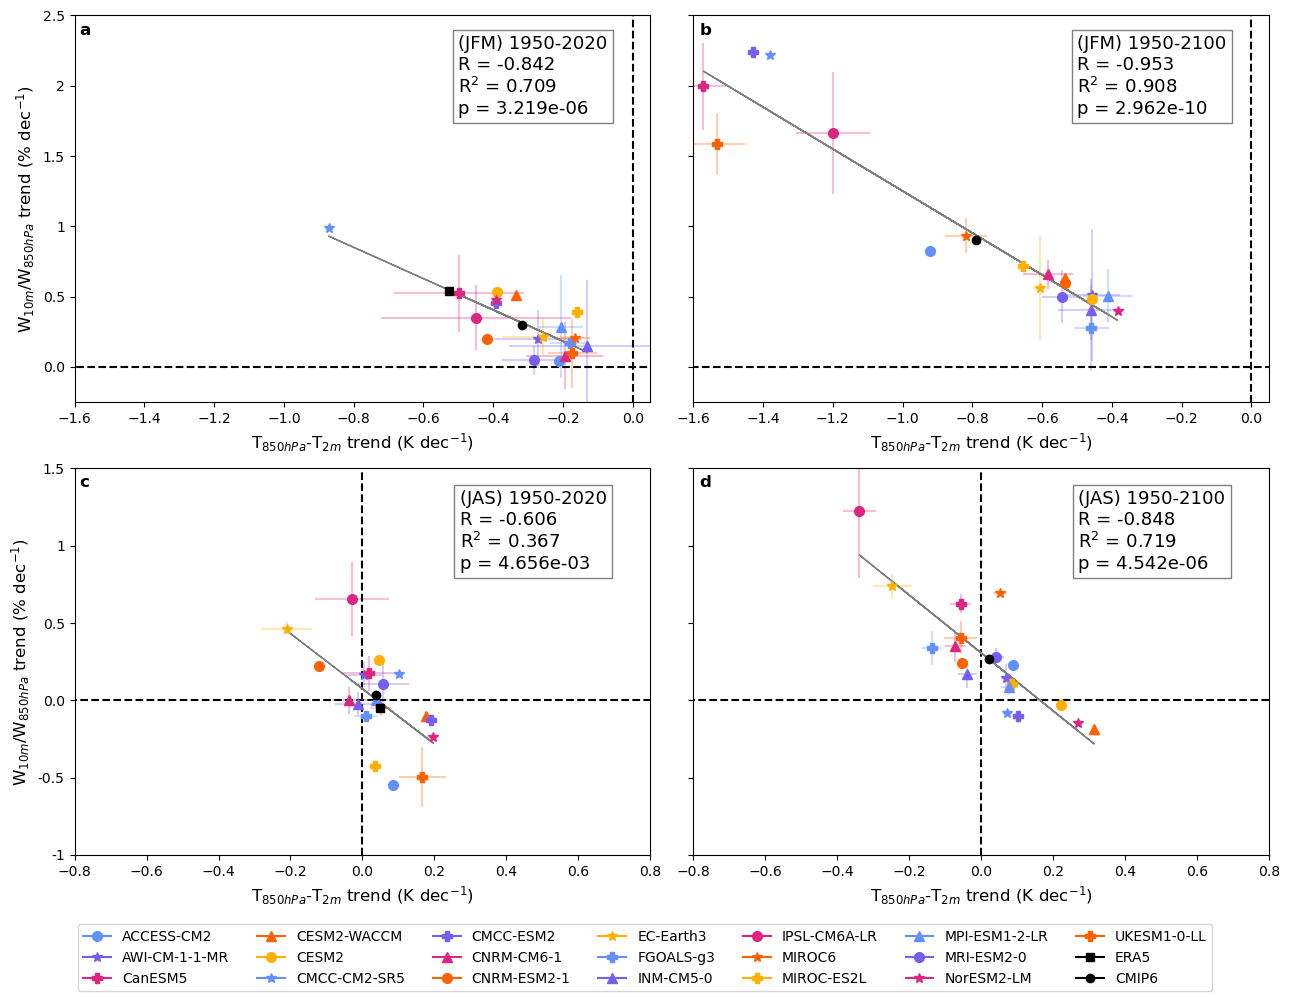

In [14]:
x = np.zeros((2))
y = [-10, 10]
colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
markers = ['o', '*', 'P', '^', 'o', '*', 'P', '^', 'o', '*', 'P', '^', 'o', '*', 'P', '^', 'o', '*', 'P', '^']

fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(221)
for i in range(0,19):
    ax.plot(JFM_dt_mean[0,i], JFM_rw_mean[0,i]*100, marker=markers[i], color=colors[i], markersize=7, label=models[i])
    ax.errorbar(JFM_dt_mean[0,i], JFM_rw_mean[0,i]*100, xerr=JFM_dt_spread[0,i]/2, yerr=(JFM_rw_spread[0,i]/2)*100, zorder=-1, alpha=0.3, color=colors[i])
ax.plot(jfm_era5_dt, jfm_era5_rw*100, color='k', marker='s', label='ERA5')
ax.plot(ENSEMBLE[0],ENSEMBLE[2]*100, color='k', marker='o', label='CMIP6')
ax.plot(x,y, color='k', linestyle='--', zorder=-1)
ax.hlines(0.0, xmin=-3, xmax=0.1, color='k', linestyle='--', zorder=-1)
ax.plot(x_hist_JFM, (x_hist_JFM*m_hist_JFM*100)+c_hist_JFM*100, '-', color='gray', linewidth=1, zorder=-1)
ax.set_xlabel('T$_{850hPa}$-T$_{2m}$ trend (K dec$^{-1}$)', fontsize=12)
ax.set_ylabel('W$_{10m}$/W$_{850hPa}$ trend (% dec$^{-1}$)', fontsize=12)
ax.set_yticks([0.0, 0.5, 1, 1.5, 2, 2.5],[0.0, 0.5, 1, 1.5, 2, 2.5])
plt.xlim([-1.6, 0.05])
plt.ylim([-0.25, 2.5])
text = '(JFM) 1950-2020\nR = %s\n' %str(r_hist_JFM) + 'R$^2$ = %s\n' %str(r_squared_hist_JFM) + 'p = %s' %str("{:.3e}".format(p_hist_JFM))
box_props = dict(boxstyle='square', facecolor='none', edgecolor='gray')
plt.text(-0.5, 1.8, text, fontsize=13, bbox=box_props)
ax = fig.add_subplot(222)
for i in range(0,19):
    ax.plot(JFM_dt_mean[1,i], JFM_rw_mean[1,i]*100, marker=markers[i], color=colors[i], markersize=7)
    ax.errorbar(JFM_dt_mean[1,i], JFM_rw_mean[1,i]*100, xerr=JFM_dt_spread[1,i]/2, yerr=(JFM_rw_spread[1,i]/2)*100, zorder=-1, alpha=0.3, color=colors[i])
ax.plot(ENSEMBLE[6],ENSEMBLE[8]*100,color='k', marker='o')
ax.plot(x,y, color='k', linestyle='--', zorder=-1)
ax.hlines(0.0, xmin=-3, xmax=0.1, color='k', linestyle='--', zorder=-1)
ax.plot(x_tot_JFM, (x_tot_JFM*m_tot_JFM*100)+c_tot_JFM*100, '-', color='gray', linewidth=1, zorder=-1)
ax.set_xlabel('T$_{850hPa}$-T$_{2m}$ trend (K dec$^{-1}$)', fontsize=12)
ax.set_yticks([0.0, 0.5, 1, 1.5, 2, 2.5],[])
plt.xlim([-1.6,0.05])
plt.ylim([-0.25, 2.5])
text = '(JFM) 1950-2100\nR = %s\n' %str(r_tot_JFM) + 'R$^2$ = %s\n' %str(r_squared_tot_JFM) + 'p = %s' %str("{:.3e}".format(p_tot_JFM))
box_props = dict(boxstyle='square', facecolor='none', edgecolor='gray')
plt.text(-0.5, 1.8, text, fontsize=13, bbox=box_props)
ax = fig.add_subplot(223)
for i in range(0,19):
    ax.plot(JAS_dt_mean[0,i], JAS_rw_mean[0,i]*100, marker=markers[i], color=colors[i], markersize=7)
    ax.errorbar(JAS_dt_mean[0,i], JAS_rw_mean[0,i]*100, xerr=JAS_dt_spread[0,i]/2, yerr=(JAS_rw_spread[0,i]/2)*100, zorder=-1, alpha=0.3, color=colors[i])
ax.plot(jas_era5_dt, jas_era5_rw*100, color='k', marker='s')
ax.plot(ENSEMBLE[1],ENSEMBLE[3]*100,color='k', marker='o')
ax.plot(x,y, color='k', linestyle='--', zorder=-1)
ax.hlines(0.0, xmin=-1, xmax=2, color='k', linestyle='--', zorder=-1)
ax.plot(x_hist_JAS, (x_hist_JAS*m_hist_JAS*100)+c_hist_JAS*100, '-', color='gray', linewidth=1, zorder=-1)
ax.set_xlabel('T$_{850hPa}$-T$_{2m}$ trend (K dec$^{-1}$)', fontsize=12)
ax.set_ylabel('W$_{10m}$/W$_{850hPa}$ trend (% dec$^{-1}$)', fontsize=12)
ax.set_yticks([-1, -0.5, 0.0, 0.5, 1, 1.5],[-1, -0.5, 0.0, 0.5, 1, 1.5])
plt.xlim([-0.8,0.8])
plt.ylim([-1,1.5])
text = '(JAS) 1950-2020\nR = %s\n' %str(r_hist_JAS) + 'R$^2$ = %s\n' %str(r_squared_hist_JAS) + 'p = %s' %str("{:.3e}".format(p_hist_JAS))
box_props = dict(boxstyle='square', facecolor='none', edgecolor='gray')
plt.text(0.27, 0.85, text, fontsize=13, bbox=box_props)
ax = fig.add_subplot(224)
for i in range(0,19):
    ax.plot(JAS_dt_mean[1,i], JAS_rw_mean[1,i]*100, marker=markers[i], color=colors[i], markersize=7)
    ax.errorbar(JAS_dt_mean[1,i], JAS_rw_mean[1,i]*100, xerr=JAS_dt_spread[1,i]/2, yerr=(JAS_rw_spread[1,i]/2)*100, zorder=-1, alpha=0.3, color=colors[i])
ax.plot(ENSEMBLE[7],ENSEMBLE[9]*100,color='k', marker='o')
ax.plot(x,y, color='k', linestyle='--', zorder=-1)
ax.hlines(0.0, xmin=-1, xmax=2, color='k', linestyle='--', zorder=-1)
ax.plot(x_tot_JAS, (x_tot_JAS*m_tot_JAS*100)+c_tot_JAS*100, '-', color='gray', linewidth=1, zorder=-1)
ax.set_xlabel('T$_{850hPa}$-T$_{2m}$ trend (K dec$^{-1}$)', fontsize=12)
ax.set_yticks([-1, -0.5, 0.0, 0.5, 1, 1.5],[])
plt.xlim([-0.8,0.8])
plt.ylim([-1,1.5])
text = '(JAS) 1950-2100\nR = %s\n' %str(r_tot_JAS) + 'R$^2$ = %s\n' %str(r_squared_tot_JAS) + 'p = %s' %str("{:.3e}".format(p_tot_JAS))
box_props = dict(boxstyle='square', facecolor='none', edgecolor='gray')
plt.text(0.27, 0.85, text, fontsize=13, bbox=box_props)
plt.tight_layout()
plt.subplots_adjust(bottom=0.14)
fig.legend(loc='lower center', ncol=7)
fig.text(0.065, 0.96, 'a', fontsize=12, fontweight='bold')
fig.text(0.542, 0.96, 'b', fontsize=12, fontweight='bold')
fig.text(0.065, 0.508, 'c', fontsize=12, fontweight='bold')
fig.text(0.542, 0.508, 'd', fontsize=12, fontweight='bold')
fig.savefig('Figure3_a-d.pdf')

In [21]:
x_hist_JFM = np.zeros((20))
y_hist_JFM = np.zeros((20))

x_hist_JFM[0] = jfm_era5_dt
y_hist_JFM[0] = jfm_era5_rw
x_hist_JFM[1:] = JFM_sic_mean[0]
y_hist_JFM[1:] = JFM_rw_mean[0]

x = np.array(x_hist_JFM)[:,np.newaxis]
y = y_hist_JFM
fit = np.polyfit(x_hist_JFM, y_hist_JFM, deg=1, full=True)
m_hist_JFM=fit[0][0]
c_hist_JFM=fit[0][1]
r_hist_JFM = np.round(pearsonr(x_hist_JFM,y_hist_JFM)[0], 3)
r_squared_hist_JFM = np.round(r_hist_JFM**2, 3)
p_hist_JFM = pearsonr(x_hist_JFM, y_hist_JFM)[1]

#########

x_hist_JAS = np.zeros((20))
y_hist_JAS = np.zeros((20))

x_hist_JAS[0] = jas_era5_dt
y_hist_JAS[0] = jas_era5_rw
x_hist_JAS[1:] = JAS_sic_mean[0]
y_hist_JAS[1:] = JAS_rw_mean[0]

fit = np.polyfit(x_hist_JAS, y_hist_JAS, deg=1, full=True)
m_hist_JAS=fit[0][0]
c_hist_JAS=fit[0][1]
r_hist_JAS = np.round(pearsonr(x_hist_JAS,y_hist_JAS)[0], 3)
r_squared_hist_JAS = np.round(r_hist_JAS**2, 3)
p_hist_JAS = pearsonr(x_hist_JAS, y_hist_JAS)[1]

#########

x_tot_JFM = np.zeros((19))
y_tot_JFM = np.zeros((19))

x_tot_JFM[:] = JFM_sic_mean[1]
y_tot_JFM[:] = JFM_rw_mean[1]

fit = np.polyfit(x_tot_JFM, y_tot_JFM, deg=1, full=True)
m_tot_JFM=fit[0][0]
c_tot_JFM=fit[0][1]
r_tot_JFM = np.round(pearsonr(x_tot_JFM,y_tot_JFM)[0], 3)
r_squared_tot_JFM = np.round(r_tot_JFM**2, 3)
p_tot_JFM = pearsonr(x_tot_JFM, y_tot_JFM)[1]

#########

x_tot_JAS = np.zeros((19))
y_tot_JAS = np.zeros((19))

x_tot_JAS[:] = JAS_sic_mean[1]
y_tot_JAS[:] = JAS_rw_mean[1]

fit = np.polyfit(x_tot_JAS, y_tot_JAS, deg=1, full=True)
m_tot_JAS=fit[0][0]
c_tot_JAS=fit[0][1]
r_tot_JAS = np.round(pearsonr(x_tot_JAS,y_tot_JAS)[0], 3)
r_squared_tot_JAS = np.round(r_tot_JAS**2, 3)
p_tot_JAS = pearsonr(x_tot_JAS, y_tot_JAS)[1]

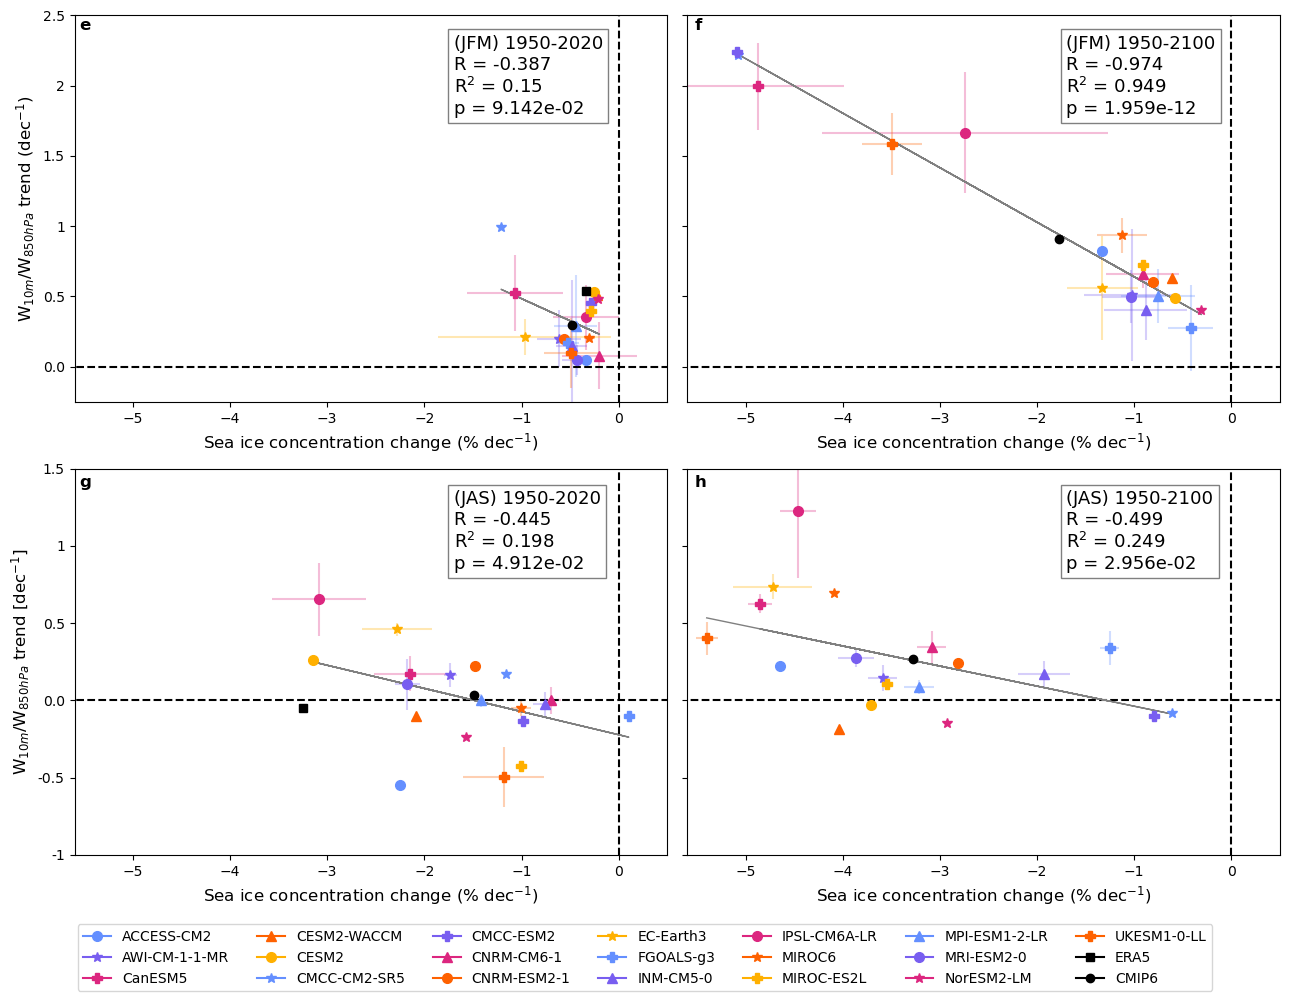

In [22]:
x = np.zeros((2))
y = [-10, 10]
colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
markers = ['o', '*', 'P', '^', 'o', '*', 'P', '^', 'o', '*', 'P', '^', 'o', '*', 'P', '^', 'o', '*', 'P', '^']

fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(221)
for i in range(0,19):
    ax.plot(JFM_sic_mean[0,i], JFM_rw_mean[0,i]*100, marker=markers[i], color=colors[i], markersize=7, label=models[i])
    ax.errorbar(JFM_sic_mean[0,i], JFM_rw_mean[0,i]*100, xerr=JFM_sic_spread[0,i]/2, yerr=(JFM_rw_spread[0,i]/2)*100, zorder=-1, alpha=0.3, color=colors[i])
ax.plot(jfm_era5_sic, jfm_era5_rw*100, color='k', marker='s', label='ERA5')
ax.plot(ENSEMBLE[4],ENSEMBLE[2]*100,color='k', marker='o', label='CMIP6')
ax.plot(x,y, color='k', linestyle='--', zorder=-1)
ax.hlines(0.0, xmin=-10, xmax=10, color='k', linestyle='--', zorder=-1)
ax.plot(x_hist_JFM, (x_hist_JFM*m_hist_JFM*100)+c_hist_JFM*100, '-', color='gray', linewidth=1, zorder=-1)
ax.set_xlabel('Sea ice concentration change (% dec$^{-1}$)', fontsize=12)
ax.set_ylabel('W$_{10m}$/W$_{850hPa}$ trend (dec$^{-1}$)', fontsize=12)
ax.set_yticks([0.0, 0.5, 1, 1.5, 2, 2.5],[0.0, 0.5, 1, 1.5, 2, 2.5])
plt.xlim([-5.6, 0.5])
plt.ylim([-0.25,2.5])
text = '(JFM) 1950-2020\nR = %s\n' %str(r_hist_JFM) + 'R$^2$ = %s\n' %str(r_squared_hist_JFM) + 'p = %s' %str("{:.3e}".format(p_hist_JFM))
box_props = dict(boxstyle='square', facecolor='none', edgecolor='gray')
plt.text(-1.7, 1.8, text, fontsize=13, bbox=box_props)
ax = fig.add_subplot(222)
for i in range(0,19):
    ax.plot(JFM_sic_mean[1,i], JFM_rw_mean[1,i]*100, marker=markers[i], color=colors[i], markersize=7)
    ax.errorbar(JFM_sic_mean[1,i], JFM_rw_mean[1,i]*100, xerr=JFM_sic_spread[1,i]/2, yerr=(JFM_rw_spread[1,i]/2)*100, zorder=-1, alpha=0.3, color=colors[i])
ax.plot(ENSEMBLE[10],ENSEMBLE[8]*100,color='k', marker='o')
ax.plot(x,y, color='k', linestyle='--', zorder=-1)
ax.hlines(0.0, xmin=-10, xmax=10, color='k', linestyle='--', zorder=-1)
ax.plot(x_tot_JFM, (x_tot_JFM*m_tot_JFM*100)+c_tot_JFM*100, '-', color='gray', linewidth=1, zorder=-1)
ax.set_xlabel('Sea ice concentration change (% dec$^{-1}$)', fontsize=12)
ax.set_yticks([0.0, 0.5, 1, 1.5, 2, 2.5],[])
plt.xlim([-5.6, 0.5])
plt.ylim([-0.25,2.5])
text = '(JFM) 1950-2100\nR = %s\n' %str(r_tot_JFM) + 'R$^2$ = %s\n' %str(r_squared_tot_JFM) + 'p = %s' %str("{:.3e}".format(p_tot_JFM))
box_props = dict(boxstyle='square', facecolor='none', edgecolor='gray')
plt.text(-1.7, 1.8, text, fontsize=13, bbox=box_props)
ax = fig.add_subplot(223)
for i in range(0,19):
    ax.plot(JAS_sic_mean[0,i], JAS_rw_mean[0,i]*100, marker=markers[i], color=colors[i], markersize=7)
    ax.errorbar(JAS_sic_mean[0,i], JAS_rw_mean[0,i]*100, xerr=JAS_sic_spread[0,i]/2, yerr=(JAS_rw_spread[0,i]/2)*100, zorder=-1, alpha=0.3, color=colors[i])
ax.plot(jas_era5_sic, jas_era5_rw*100, color='k', marker='s')
ax.plot(ENSEMBLE[5],ENSEMBLE[3]*100,color='k', marker='o')
ax.plot(x,y, color='k', linestyle='--', zorder=-1)
ax.hlines(0.0, xmin=-10, xmax=10, color='k', linestyle='--', zorder=-1)
ax.plot(x_hist_JAS, (x_hist_JAS*m_hist_JAS*100)+c_hist_JAS*100, '-', color='gray', linewidth=1, zorder=-1)
ax.set_xlabel('Sea ice concentration change (% dec$^{-1}$)', fontsize=12)
ax.set_ylabel('W$_{10m}$/W$_{850hPa}$ trend [dec$^{-1}$]', fontsize=12)
ax.set_yticks([-1, -0.5, 0.0, 0.5, 1, 1.5],[-1, -0.5, 0.0, 0.5, 1, 1.5])
plt.xlim([-5.6,0.5])
plt.ylim([-1,1.5])
text = '(JAS) 1950-2020\nR = %s\n' %str(r_hist_JAS) + 'R$^2$ = %s\n' %str(r_squared_hist_JAS) + 'p = %s' %str("{:.3e}".format(p_hist_JAS))
box_props = dict(boxstyle='square', facecolor='none', edgecolor='gray')
plt.text(-1.7, 0.85, text, fontsize=13, bbox=box_props)
ax = fig.add_subplot(224)
for i in range(0,19):
    ax.plot(JAS_sic_mean[1,i], JAS_rw_mean[1,i]*100, marker=markers[i], color=colors[i], markersize=7)
    ax.errorbar(JAS_sic_mean[1,i], JAS_rw_mean[1,i]*100, xerr=JAS_sic_spread[1,i]/2, yerr=(JAS_rw_spread[1,i]/2)*100, zorder=-1, alpha=0.3, color=colors[i])
ax.plot(ENSEMBLE[11],ENSEMBLE[9]*100,color='k', marker='o')
ax.plot(x,y, color='k', linestyle='--', zorder=-1)
ax.hlines(0.0, xmin=-10, xmax=10, color='k', linestyle='--', zorder=-1)
ax.plot(x_tot_JAS, (x_tot_JAS*m_tot_JAS*100)+c_tot_JAS*100, '-', color='gray', linewidth=1, zorder=-1)
ax.set_xlabel('Sea ice concentration change (% dec$^{-1}$)', fontsize=12)
ax.set_yticks([-1, -0.5, 0.0, 0.5, 1, 1.5],[])
plt.xlim([-5.6,0.5])
plt.ylim([-1,1.5])
text = '(JAS) 1950-2100\nR = %s\n' %str(r_tot_JAS) + 'R$^2$ = %s\n' %str(r_squared_tot_JAS) + 'p = %s' %str("{:.3e}".format(p_tot_JAS))
box_props = dict(boxstyle='square', facecolor='none', edgecolor='gray')
plt.text(-1.7, 0.85, text, fontsize=13, bbox=box_props)
plt.tight_layout()
plt.subplots_adjust(bottom=0.14)
fig.legend(loc='lower center', ncol=7)
fig.text(0.065, 0.965, 'e', fontsize=12, fontweight='bold')
fig.text(0.538, 0.965, 'f', fontsize=12, fontweight='bold')
fig.text(0.065, 0.508, 'g', fontsize=12, fontweight='bold')
fig.text(0.538, 0.508, 'h', fontsize=12, fontweight='bold')
fig.savefig('Figure3_e-h.pdf')